# Breast Cancer Classification

## Load Dataset

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
feature_raw, label_raw = load_breast_cancer(return_X_y=True)
print(feature_raw.shape, label_raw.shape)

(569, 30) (569,)


### Regulate Dataset

In [4]:
feature_train = feature_raw / feature_raw.max(axis=0)
label_train = label_raw.reshape(-1, 1)
print(feature_train.shape, label_train.shape)

(569, 30) (569, 1)


## Make a Model

In [9]:
# Define linear function
def linear(in_features, weight, bias):
    return in_features @ weight.T + bias

# Define ReLU function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(in_features, weight, bias):
    out_features = linear(in_features, weight, bias)
    pred = sigmoid(out_features)
    return pred

# Sanity check
w_dummy = np.random.normal(0, 1e-2, (1, feature_train.shape[1]))
b_dummy = np.random.normal(0, 1e-2)
pred_dummy = forward(feature_train, w_dummy, b_dummy)
# print(pred_dummy)
pred_class_dummy = pred_dummy > 0.5
# print(pred_class_dummy)
# print(pred_class_dummy, label_train)
# print(pred_class_dummy==label_train)
accuracy = np.sum(pred_class_dummy==label_train) / label_train.shape[0]
print(accuracy)

0.6274165202108963


## Evaluate Model with Binary Cross-Entropy Loss

In [10]:
def bce_loss(pred, label):
    error = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
    return np.mean(error)

# Sanity check
loss_dummy = bce_loss(pred_dummy, label_train)
print(loss_dummy)

0.692761052052111


## Gradient Descent Model Optimization

initial parameters: w = [[ 9.97172504e-05  1.03278676e-05  1.97995178e-04  7.37045658e-05
  -1.58585045e-04 -2.10368613e-04 -1.83712159e-04  7.28497424e-05
   5.99051507e-05 -1.42168971e-04  6.11316384e-06  1.67196638e-04
  -6.30512917e-05  8.02723316e-05 -4.30691209e-05  6.15198203e-05
   5.11398998e-05  5.32214682e-06  1.01888936e-04 -1.89746651e-05
  -1.49388920e-06  1.05878280e-04  2.99656981e-05 -6.31618801e-05
   8.27372095e-05 -1.13285689e-04  1.21927915e-05 -1.50572787e-04
  -4.15015988e-05  1.64020954e-04]], b = -3.194947822795074e-05
loss @ 1 iteration: 0.6931312898489269
loss @ 2 iteration: 0.6634374984227327
loss @ 3 iteration: 0.6439634362669228
loss @ 4 iteration: 0.6257392963383807
loss @ 5 iteration: 0.6086684303379083
loss @ 6 iteration: 0.5926703012703761
loss @ 7 iteration: 0.5776674954482194
loss @ 8 iteration: 0.5635864401316157
loss @ 9 iteration: 0.5503578646545337
loss @ 10 iteration: 0.5379170445482545
loss @ 11 iteration: 0.5262038713875474
loss @ 12 iteration

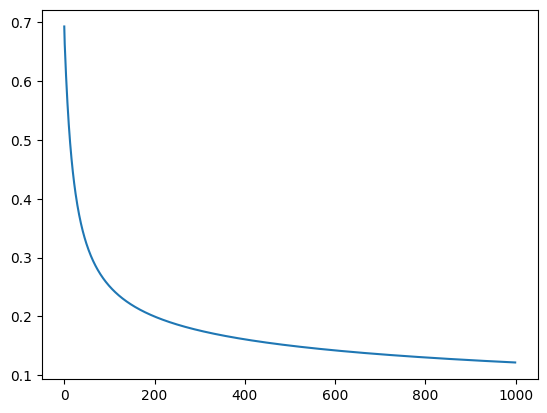

In [17]:
def grad(in_features, pred, label):
    dw = 1 / label.shape[0] * (pred - label).T @ in_features
    db = np.mean(pred - label)
    return dw, db

w = np.random.normal(0, 1e-4, (1, feature_train.shape[1])) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 1000
learning_rate = 0.8
losses = []
for i in range(num_iters):
    pred_train = forward(feature_train, w, b)
    loss = bce_loss(pred_train, label_train)
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
    dw, db = grad(feature_train, pred_train, label_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
import matplotlib.pyplot as plt
plt.plot(losses)

## Assess Training Accuracy

In [20]:
pred_class_train = pred_train > 0.5
acc_train = np.sum(pred_class_train==label_train) / label_train.shape[0]
print(acc_train)
print(f"prediction: {pred_train.squeeze()[:20]}")
print(f"pred class: {pred_class_train.squeeze()[:20]}")
print(f"true class: {label_raw[:20]}")


0.9648506151142355
prediction: [1.35617314e-04 1.54305424e-02 6.37849451e-04 1.15698806e-01
 1.07899260e-02 3.41065196e-01 1.21416904e-02 5.05031107e-01
 6.81044434e-02 2.12922818e-02 4.88044520e-01 5.55502254e-02
 1.81161017e-02 4.52879666e-01 5.69212552e-02 4.59945503e-02
 1.68749388e-01 1.11483402e-02 1.75343463e-04 8.06747347e-01]
pred class: [False False False False False False False  True False False False False
 False False False False False False False  True]
true class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
